In [28]:
import numpy as np
import sys
import seaborn as sns
sys.path.insert(0, '../mutationalsignature/')
from file.file.vcf import read_vcf

%matplotlib inline

In [3]:
VCF_FILE_PATH = '../../../../guardiome/repositories/create-genome-app/genome-app/data/dna.vcf.gz'

In [5]:
vcf_dict = read_vcf(VCF_FILE_PATH)

Not parsing: VCFv4.1.
Not parsing: file:///wgc/dev/wanguan2000/working/s490x10001/hg38_database/fasta/hg38.filter.fa.
Not parsing: SelectVariants.
Not parsing: 1.3+htslib-1.3.
Not parsing: concat -a -o 738.concat_snp_indel.vcf snp/738_snp.vcf.gz indel/738_indel.vcf.gz.
Not parsing: "4.2 (build 2015-12-05), by Pablo Cingolani".
Not parsing: "SnpEff  -s 738.concat_snp_indel.extract_chr.recode.ann_snpeff.html GRCh38.82 738.concat_snp_indel.extract_chr.recode.vcf.gz ".
Not parsing: "SnpSift 4.2 (build 2015-12-05), by Pablo Cingolani".
Not parsing: 1.3+htslib-1.3.


/home/k/Jumis/tools/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [10]:
chromosome_groups = vcf_dict['data'].groupby('CHROM')

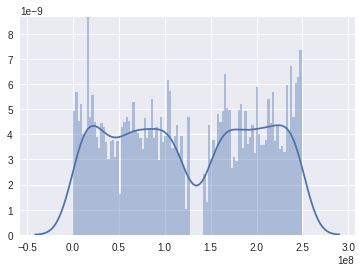

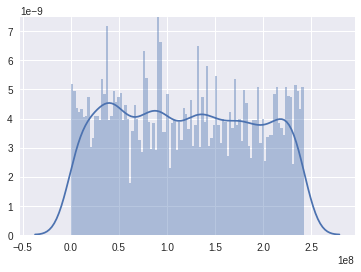

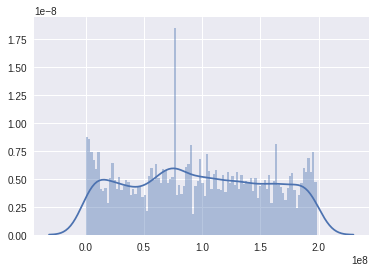

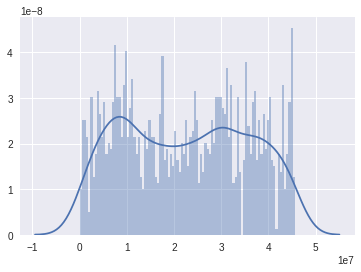

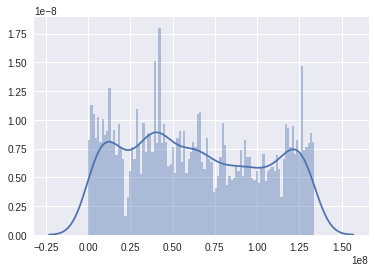

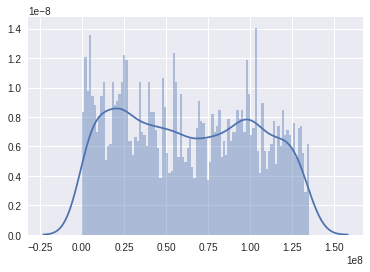

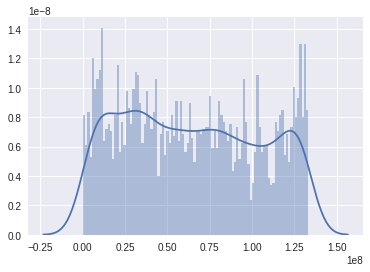

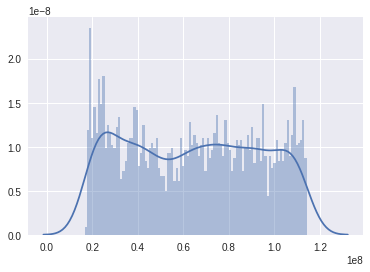

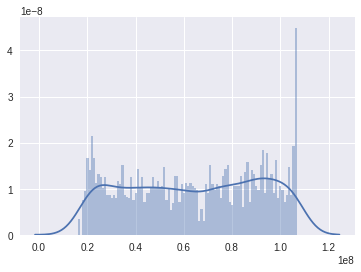

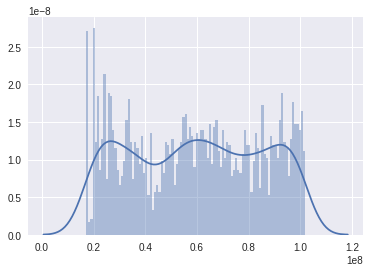

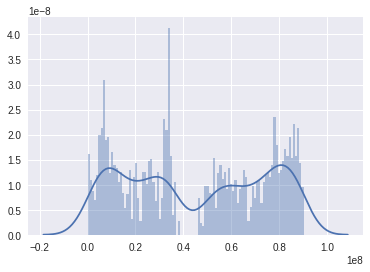

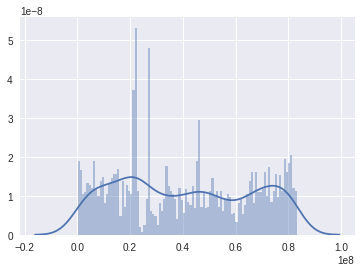

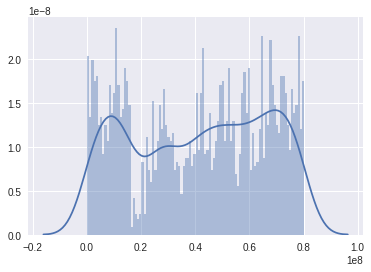

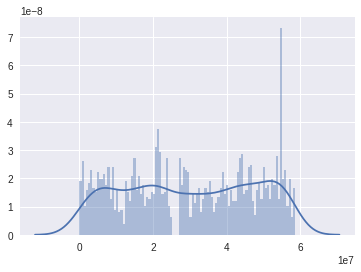

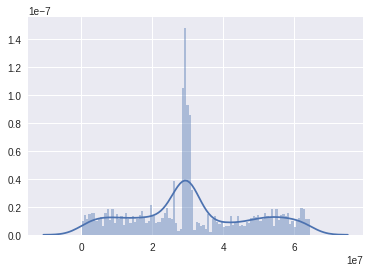

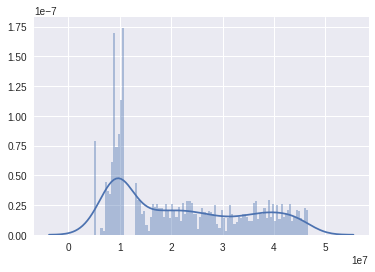

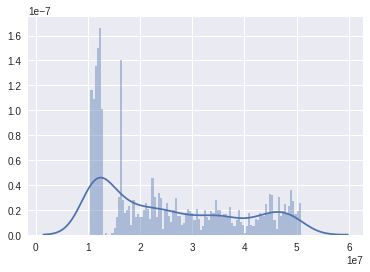

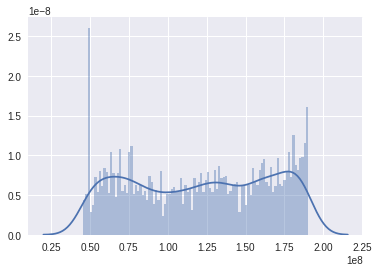

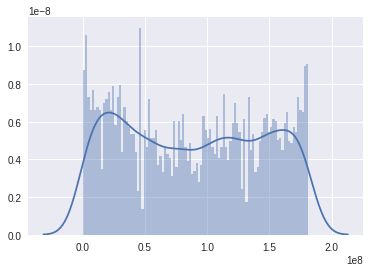

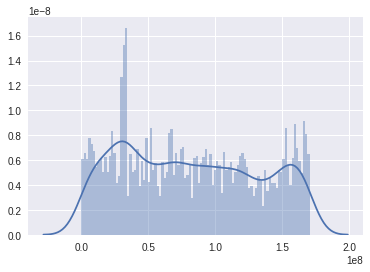

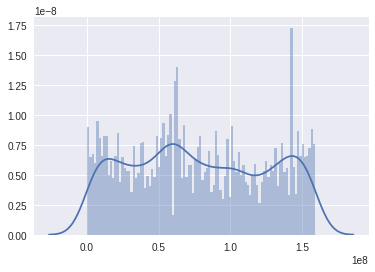

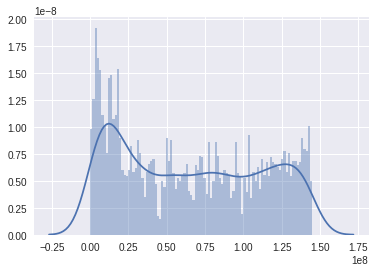

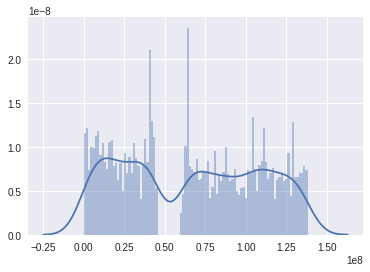

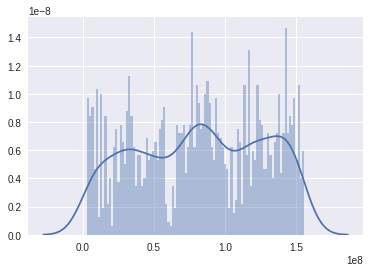

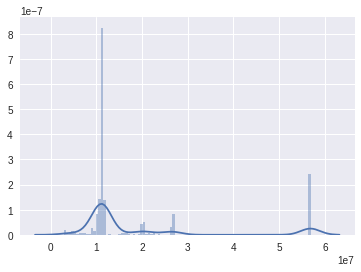

In [33]:
for k, v in chromosome_groups:
    
    x = np.asarray(v['POS'])
#     y = np.ones_like(x)
    
    sns.distplot(x, bins=100)
    sns.mpl.pyplot.show()